# Data Import and Visualisation

### ZeMA testbed dataset

Testbed at ZeMa is for condition monitoring and lifetime prognoses of the electro-mechanical cylinders (EMC).

Data from these 11 sensors is available for estimation of remainig lifetime:
- Microphone
- Vibration plain bearing
- Vibration piston rod
- Vibration ball bearing
- Axial force
- Pressure
- Velocity
- Active current
- Motor current phase 1
- Motor current phase 2
- Motor current phase 3

Through this code sensors are represented with numbers 0-10 in same order sensors are listed. Working cycle consists of forward stroke, waiting time and return stroke, and available data is from measurements of 1 second of return stroke with frequency being 2 kHz [1].

<img src="pictures/stroke.png" width="800">

This specific data consists of 6291 EMC cycles where first cycle represents fully functional part and in the last cycle the EMC is fully broken (has no remaining lifetime). Lifetime is represented with percentage values where 0 % means being brand-new and 100 % being broken.

### Importing the data

Data is downloaded from the https://zenodo.org/record/1326278#.XQJMGI_gqUk website and following informations about the structure of the data are listed there:
- data saved in HDF5 file as a 3D-matrix
- one row represents one second of the return stroke of one working cycle (6292 rows: 6292 cycles)
- one column represents one datapoint of the cycle, that is resampled to 2 kHz (2000 columns)
- one page represent one sensor (11 pages: 11 sensors)

Last cycle of downloaded data is cut because it has no useful informations.

Data is imported into the list of length 11, where each element consists of dataframe whose rows are time-series of cycles.  

## Note!!! 
**Data downloaded from the link have to be located in the sam folder as Jupyter Notebooks in order to import the data. Name of the file must remain the same (Sensor_data_2kHz.h5). You can do it on your own or it can be done automatically**

In [1]:
import h5py                                     # Importing the h5 package.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 13}
mpl.rc('font', **font)

In [2]:
import requests
from IPython.display import display
from ipywidgets import IntProgress

url = 'https://zenodo.org/record/1326278/files/Sensor_data_2kHz.h5'


def get_filename(url):
    return url.split('/')[-1]


def DownloadFile(url):
    local_filename = get_filename(url)
    r = requests.get(url, stream=True)

    # Compute parameters for download and corresponding progress bar.
    total_length = int(r.headers.get('content-length'))
    chunk_size = 512 * 1024

    bar = IntProgress(min=0, max=total_length)       # instantiate the bar
    display(bar)                                  # display the bar

    f = open(local_filename, 'wb')
    for chunk in r.iter_content(chunk_size=chunk_size):
        if chunk:  # filter out keep-alive new chunks
            f.write(chunk)
            bar.value += chunk_size                # increment the bar
    f.close()
    return local_filename

In [3]:
import os

#Check if the file is existing already, if not download the file.
filename = get_filename(url)

if os.path.isfile(filename):
    print("Data already exist.\n")
else:
    print("Download data...")
    DownloadFile(url)
    print("Download finished.\n")
                                                  # Importing the h5 file.
print("Import data... ")
f = h5py.File(filename, 'r')                      # Importing the h5 file.
print("Import finished.\n")

Data already exist.

Import data... 
Import finished.



In [4]:
a_group_key = list(f.keys())[0]

data = list(f[a_group_key])                       # Transforming data into list

sensorADC=[]                                      # Initialising a list "sensor" and
for i in range(11):                               # Filling it with data from all sensors 
    sensorADC.append(pd.DataFrame(data[i][:][:]))

for i in range(11):                             
    sensorADC[i]=sensorADC[i].iloc[:,:6291]       # Cuting the last cycle because it contains all zero elements.

print("""    
Input matrices have dimensions: %s, where %s represents number of measurements in time
and %s represents number of cycles.""" % (np.shape(sensorADC[0]),np.shape(sensorADC[0])[0],np.shape(sensorADC[0])[1]))


    
Input matrices have dimensions: (2000, 6291), where 2000 represents number of measurements in time
and 6291 represents number of cycles.


### Basic visualisation for imported dataset
2000 samples are transformed isto real-time, and user can define which cycle to plot as an example plot for all 11 sensors. As we said, there are 6290 cycles and showing one of these will give us a basic trends for all 11 sensors.

Enter a number of example cycle you want to plot (1-6291): 70
n_of_samples = 2000


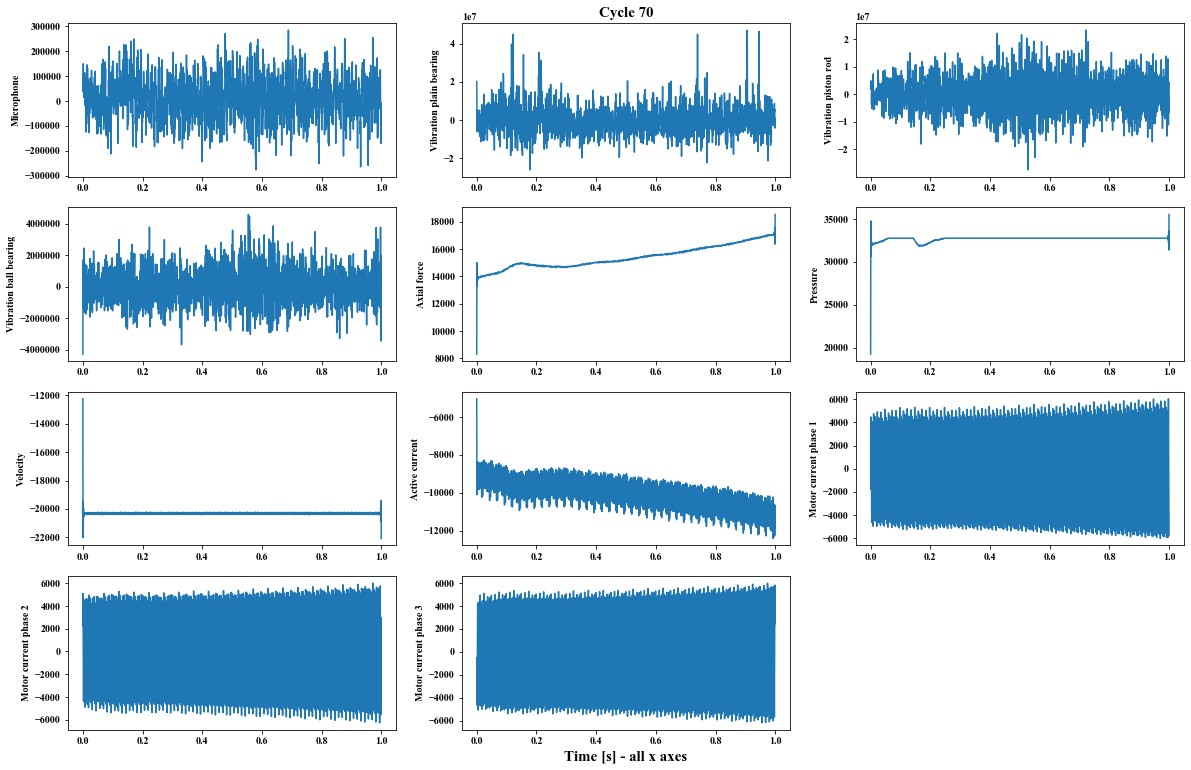

In [5]:
# Choose cycle number to plot
cycle_number = int(input("Enter a number of example cycle you want to plot (1-6291): "))
cycle_number = cycle_number-1

# Tranforming x axis into time domain.
n_of_samples=np.shape(sensorADC[0])[0]
print("n_of_samples = %s" % n_of_samples)
time = [i * 0.0005 for i in list(range(np.size(sensorADC[0].iloc[:,0])))]

# Ploting data examples from all sensors in time domain.
plt.figure(figsize=(20,13))

plt.subplot(431)
plt.plot(time, sensorADC[0].iloc[:,cycle_number])
plt.ylabel("Microphone", fontsize=10) 

plt.subplot(432)
plt.plot(time, sensorADC[1].iloc[:,cycle_number])
plt.ylabel("Vibration plain bearing", fontsize=10)
plt.title("Cycle %s" % (cycle_number+1),fontsize=15)

plt.subplot(433)
plt.plot(time, sensorADC[2].iloc[:,cycle_number])
plt.ylabel("Vibration piston rod", fontsize=10) 

plt.subplot(434)
plt.plot(time, sensorADC[3].iloc[:,cycle_number])
plt.ylabel("Vibration ball bearing", fontsize=10) 

plt.subplot(435)
plt.plot(time, sensorADC[4].iloc[:,cycle_number])
plt.ylabel("Axial force", fontsize=10)                                    
                                                           
plt.subplot(436)                                          
plt.plot(time, sensorADC[5].iloc[:,cycle_number])
plt.ylabel("Pressure", fontsize=10) 

plt.subplot(437)
plt.plot(time, sensorADC[6].iloc[:,cycle_number])
plt.ylabel("Velocity", fontsize=10) 

plt.subplot(438)
plt.plot(time, sensorADC[7].iloc[:,cycle_number])
plt.ylabel("Active current", fontsize=10) 

plt.subplot(439)
plt.plot(time, sensorADC[8].iloc[:,cycle_number])
plt.ylabel("Motor current phase 1", fontsize=10) 

plt.subplot(4,3,10)
plt.plot(time, sensorADC[9].iloc[:,cycle_number])
plt.ylabel("Motor current phase 2", fontsize=10) 

plt.subplot(4,3,11)
plt.plot(time, sensorADC[10].iloc[:,cycle_number])
plt.ylabel("Motor current phase 3", fontsize=10)
plt.xlabel("Time [s] - all x axes", fontsize=15) 

plt.show()

As you can see, there is no dimensions for physical quantities on these graphs. The reason is because these are the ADC values (digital output after measurement). For conversion of ADC values to SI units, table of conversion factors is given by ZeMA. That table is shown in picture below.

<img src="pictures/ADCtoSI.png" width="800">

First, constant from the table are created..

In [6]:
# Order of sensors in the picture is different from the order in imported data, which will be followed.

offset=[0, 0, 0, 0, 0.00488591, 0.00488591, 0.00488591,  0.00488591, 1.36e-2, 1.5e-2, 1.09e-2]
gain=[5.36e-9, 5.36e-9, 5.36e-9, 5.36e-9, 3.29e-4, 3.29e-4, 3.29e-4, 3.29e-4, 8.76e-5, 8.68e-5, 8.65e-5]
b=[1, 1, 1, 1, 1, 1, 1, 1, 5.299641744, 5.299641744, 5.299641744]
k=[250, 1, 10, 10, 1.25, 1, 30, 0.5, 2, 2, 2]
units=['[Pa]', '[g]', '[g]', '[g]', '[kN]', '[bar]', '[mm/s]', '[A]', '[A]', '[A]', '[A]']

Based on the relation from the picture, this data will be converted into SI units.

In [7]:
sensor=[0]*len(sensorADC)

for i in range(len(sensorADC)):
    sensor[i]=((sensorADC[i]*gain[i])+offset[i])*b[i]*k[i]

###### If you have problems with previous step, you can skip conversion into SI units by runing next cell.

In [9]:
sensor=sensorADC

Now, some bigger graphs will be shown. All physical quantities are shown with their SI units. 

In [10]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rc('font', **font)

In [13]:
# Choose which cycle you want to plot
cycle_number = int(input("Enter a number of example cycle you want to plot (1-6291): "))
cycle_number = cycle_number-1

Enter a number of example cycle you want to plot (1-6291): 90


Text(0.5, 0, 'Time [s]')

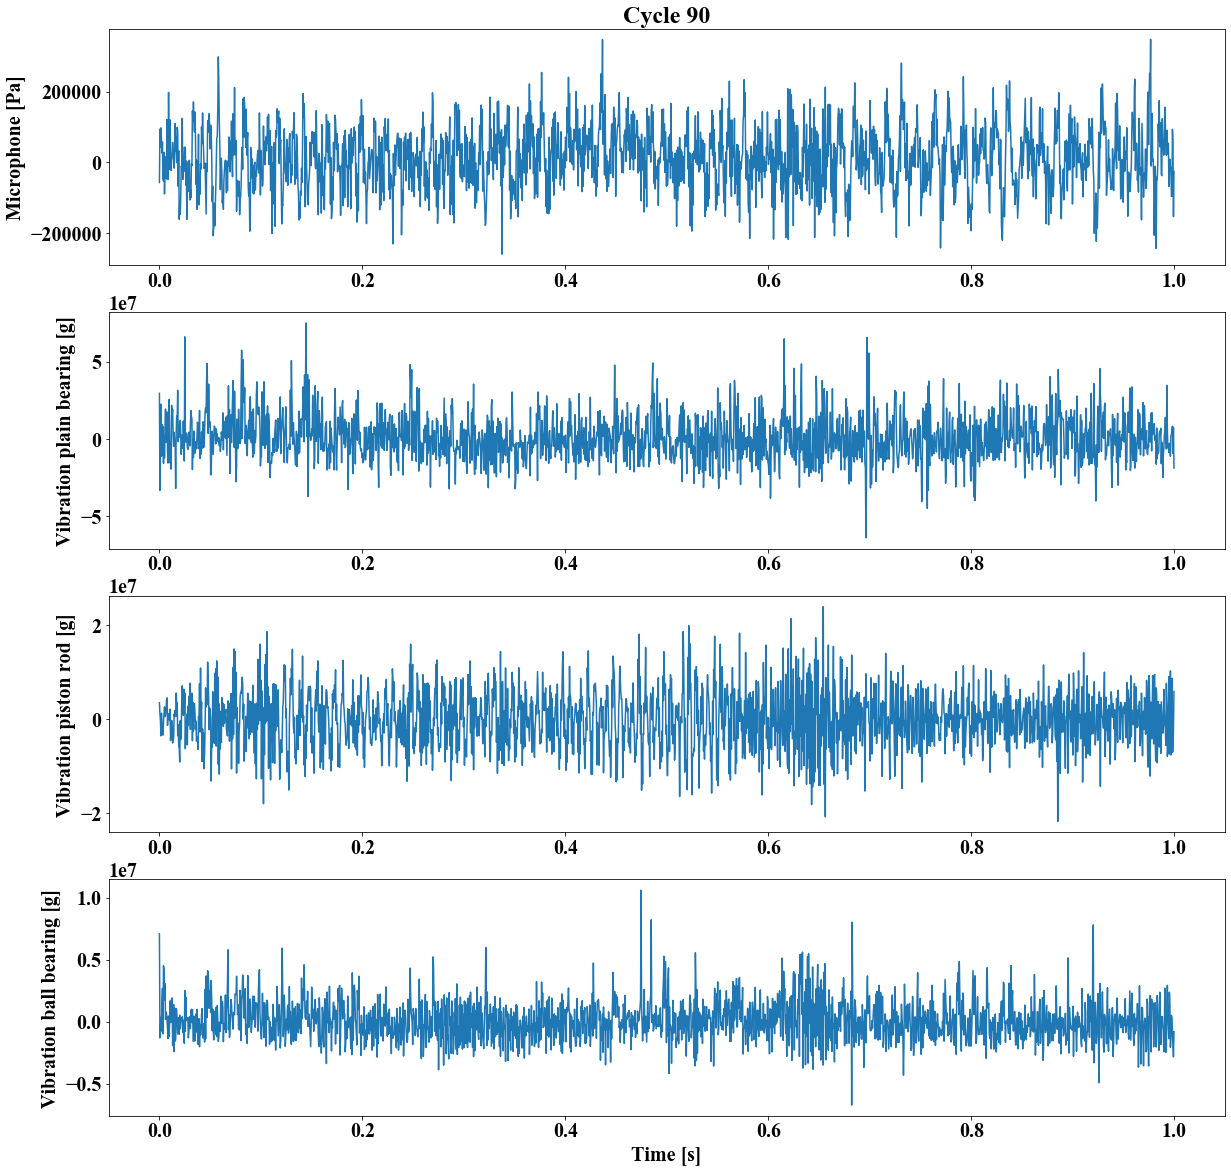

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(time, sensor[0].iloc[:,cycle_number])
plt.ylabel("Microphone " + str(units[0])) 
plt.title("Cycle %s" % (cycle_number+1))

plt.subplot(412)
plt.plot(time, sensor[1].iloc[:,cycle_number])
plt.ylabel("Vibration plain bearing "+str(units[1]))


plt.subplot(413)
plt.plot(time, sensor[2].iloc[:,cycle_number])
plt.ylabel("Vibration piston rod "+str(units[2])) 

plt.subplot(414)
plt.plot(time, sensor[3].iloc[:,cycle_number])
plt.ylabel("Vibration ball bearing "+str(units[3]))
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

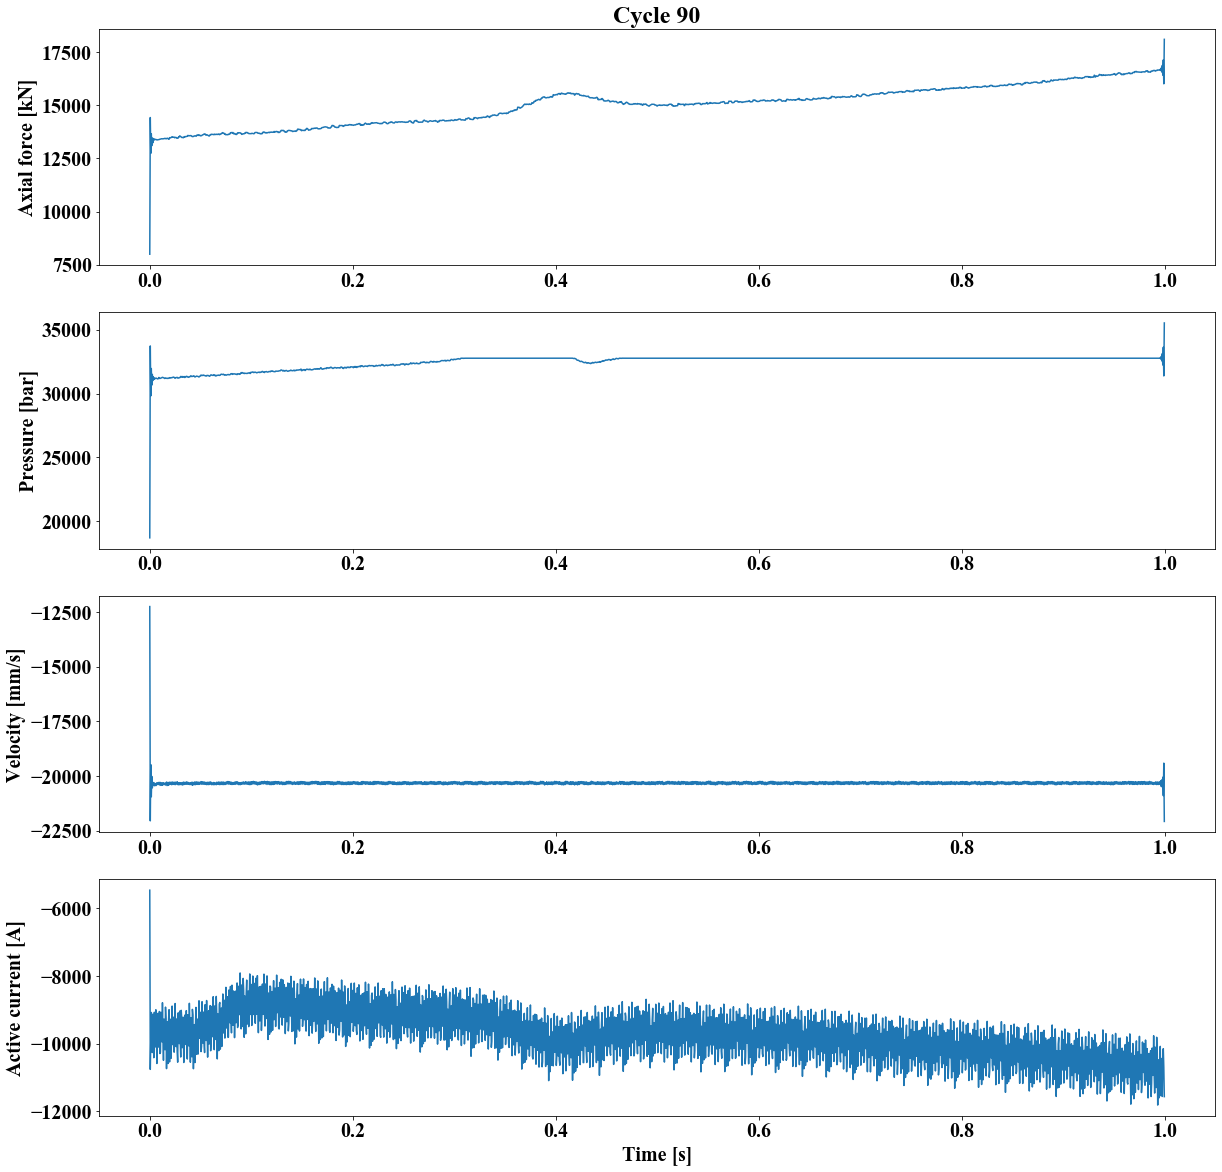

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(time, sensor[4].iloc[:,cycle_number])
plt.ylabel("Axial force " + str(units[4])) 
plt.title("Cycle %s" % (cycle_number+1))

plt.subplot(412)
plt.plot(time, sensor[5].iloc[:,cycle_number])
plt.ylabel("Pressure "+str(units[5]))


plt.subplot(413)
plt.plot(time, sensor[6].iloc[:,cycle_number])
plt.ylabel("Velocity "+str(units[6])) 

plt.subplot(414)
plt.plot(time, sensor[7].iloc[:,cycle_number])
plt.ylabel("Active current "+str(units[7]))
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

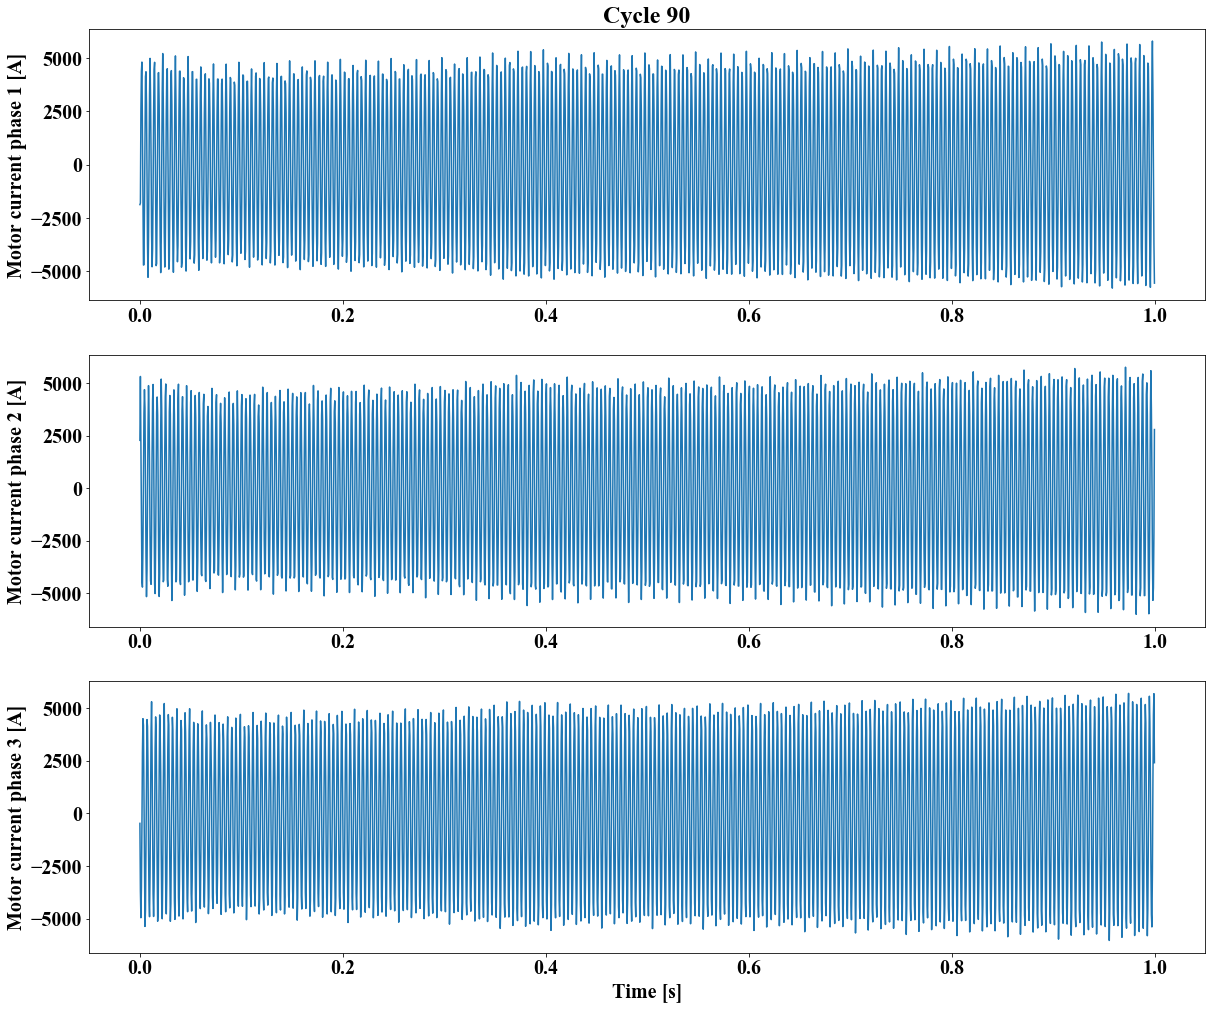

In [16]:
plt.figure(figsize=(20,17))

plt.subplot(311)
plt.plot(time, sensor[8].iloc[:,cycle_number])
plt.ylabel("Motor current phase 1 " + str(units[8])) 
plt.title("Cycle %s" % (cycle_number+1))

plt.subplot(312)
plt.plot(time, sensor[9].iloc[:,cycle_number])
plt.ylabel("Motor current phase 2 "+str(units[9]))


plt.subplot(313)
plt.plot(time, sensor[10].iloc[:,cycle_number])
plt.ylabel("Motor current phase 3 "+str(units[10]))
plt.xlabel('Time [s]')

### References:

[1]  PTB, ZeMA, - Deep dive into the ZeMA machine learning (ppt), January 2019

[2]  https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft

[3]  http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r

[4]  https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

[4]  Edouard Duchesnay, Tommy Löfstedt, - Statistics and Machine Learning in Python, March 2018


